In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
print(f"Working from {Path.cwd()} folder on host machine, linked into Docker image.")
import os
# Jupyter WORK directory is the root of my project in GIT, from jupyter_notebooks folder that is '..' (one up)
os.listdir('../work/')





# cloudruns folder is where I store the email attachments I receive from the contest organizers, daily.
duopoly_trace = pd.read_csv('../work/cloudruns/my_dpc_results_duopoly_2020-07-18.csv')


duopoly_trace


Working from /home/jovyan/notebooks folder on host machine, linked into Docker image.


,simulation,period,price,demand,revenue,competitor_prices,computation_time,selling_season,period_in_selling_season,competitor_out_of_stock,own_error
0,1,1,100.0,0,0.0,50.0,0.0,1,1,0,0
1,1,2,80.4,0,0.0,48.1,0.0,1,2,0,0
2,1,3,64.8,0,0.0,48.5,0.0,1,3,0,0
3,1,4,52.4,0,0.0,52.3,0.0,1,4,0,0
4,1,5,42.4,2,84.8,51.4,0.0,1,5,0,0
5,1,6,48.5,2,97.0,55.4,0.0,1,6,0,0
6,1,7,55.6,1,55.6,56.8,0.0,1,7,0,0
7,1,8,57.0,0,0.0,60.7,0.0,1,8,0,0
8,1,9,46.6,3,139.9,56.0,0.0,1,9,0,0
9,1,10,59.6,0,0.0,60.9,0.0,1,10,0,0


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


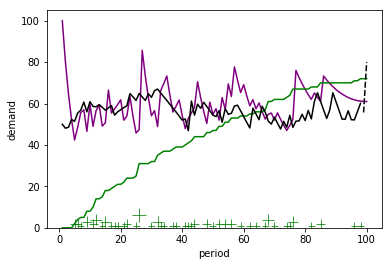

In [47]:
#simple plot of 1 game
sim1_filter = duopoly_trace['simulation'] == 1
sim1 = duopoly_trace[sim1_filter]
sim1_season1 = sim1[sim1['selling_season'] == 1]
bugs = sim1_season1[ sim1_season1['own_error']>0 ]
sales = sim1_season1[ sim1_season1['demand'] > 0 ]
sim1_season1['cum_demand'] = sim1_season1['demand'].cumsum()

plt.ylim(0, 105)
sns.lineplot(data=sim1_season1, x='period', y='price', color='purple')
sns.lineplot(data=sim1_season1, x='period', y='cum_demand', color='green')


sns.lineplot(data=sim1_season1, x='period', y='competitor_prices', style='competitor_out_of_stock', color='black', legend=None)
sns.scatterplot(data=bugs, x="period", y="own_error", size="own_error", sizes=(200,300) )
sns.scatterplot(data=sales, x="period", y="demand", size="demand", sizes=(50,200), marker='+', color='green', legend=None)


In [33]:
sales = sim1_season1[ sim1_season1['demand'] > 0 ]
free_seats = 80 - sales.cumsum()
free_seats

,simulation,period,price,demand,revenue,competitor_prices,computation_time,selling_season,period_in_selling_season,competitor_out_of_stock,own_error
4,79.0,75.0,37.6,78.0,-4.8,28.6,80.0,79.0,75.0,80.0,80.0
5,78.0,69.0,-10.9,76.0,-101.8,-26.8,80.0,78.0,69.0,80.0,80.0
6,77.0,62.0,-66.5,75.0,-157.4,-83.6,80.0,77.0,62.0,80.0,80.0
8,76.0,53.0,-113.1,72.0,-297.3,-139.6,80.0,76.0,53.0,80.0,80.0
10,75.0,42.0,-162.1,70.0,-395.3,-198.2,80.0,75.0,42.0,80.0,80.0
11,74.0,30.0,-218.7,66.0,-621.6,-256.6,80.0,74.0,30.0,80.0,80.0
13,73.0,16.0,-267.8,65.0,-670.7,-314.8,80.0,73.0,16.0,80.0,80.0
14,72.0,1.0,-318.5,62.0,-822.7,-371.6,80.0,72.0,1.0,80.0,80.0
16,71.0,-16.0,-373.9,61.0,-878.1,-430.6,80.0,71.0,-16.0,80.0,80.0
17,70.0,-34.0,-431.3,60.0,-935.5,-485.0,80.0,70.0,-34.0,80.0,80.0


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


<function matplotlib.pyplot.show(*args, **kw)>

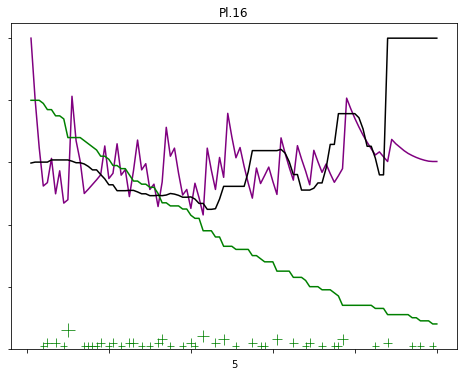

In [61]:
def slice_one_simulation(raw_data, simulation_int, season_int):
    '''convenience pandas filter - slice the dataset by simulation and season, to draw 100 periods (one game). 
    EXAMPLE: simulation 3 in season 1 returns periods 301..400, 100 rows of the raw_data'''
    
    period_filter = (raw_data['simulation'] == simulation_int) & (raw_data['selling_season'] == season_int)
    slice = raw_data[period_filter]
    slice['cum_demand'] = 80 - slice['demand'].cumsum()
    return slice

def plot_one_simulation(ax, raw_data, simulation, season, competition_name):
    '''Plot a chart of 1 game (100 periods), with chart title referring to data, and file name to match.
    REQ: inputs simulation and season are 1-based (counting from 1)
    '''
    d = slice_one_simulation(raw_data, simulation, season)
    
    # convenience shorthands
    bugs = d[ d['own_error'] >0 ]
    sales = d[ d['demand'] > 0 ]
    
    ax.set_ylim(0, 105)
    sns.lineplot(ax=ax, data=d, x='period', y='price', color='purple')
    sns.lineplot(ax=ax, data=d, x='period', y='cum_demand', color='green')
    sns.lineplot(ax=ax, data=d, x='period', y='competitor_prices', style='competitor_out_of_stock', color='black', legend=None)
    sns.scatterplot(ax=ax, data=bugs, x="period", y="own_error", size="own_error", sizes=(200,300) )
    sns.scatterplot(ax=ax, data=sales, x="period", y="demand", size="demand", sizes=(50,200), marker='+', color='green', legend=None)
    ax.set_title( f"Pl.{simulation}" )
    ax.set_xlabel(f"{season}")
    ax.set_ylabel("")
    
    # no tick labels: x
    labels = [item.get_text() for item in ax.get_xticklabels()]
    empty_string_labels = ['']*len(labels)
    ax.set_xticklabels(empty_string_labels)
    
     # no tick labels: x
    ylabels = [item.get_text() for item in ax.get_yticklabels()]
    empty_string_labels = ['']*len(ylabels)
    ax.set_yticklabels(empty_string_labels)
    
#test it
fig, ax = plt.subplots(figsize=(8, 6))
plot_one_simulation(ax, duopoly_trace, 16, 5, "DUO")
plt.show
    

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


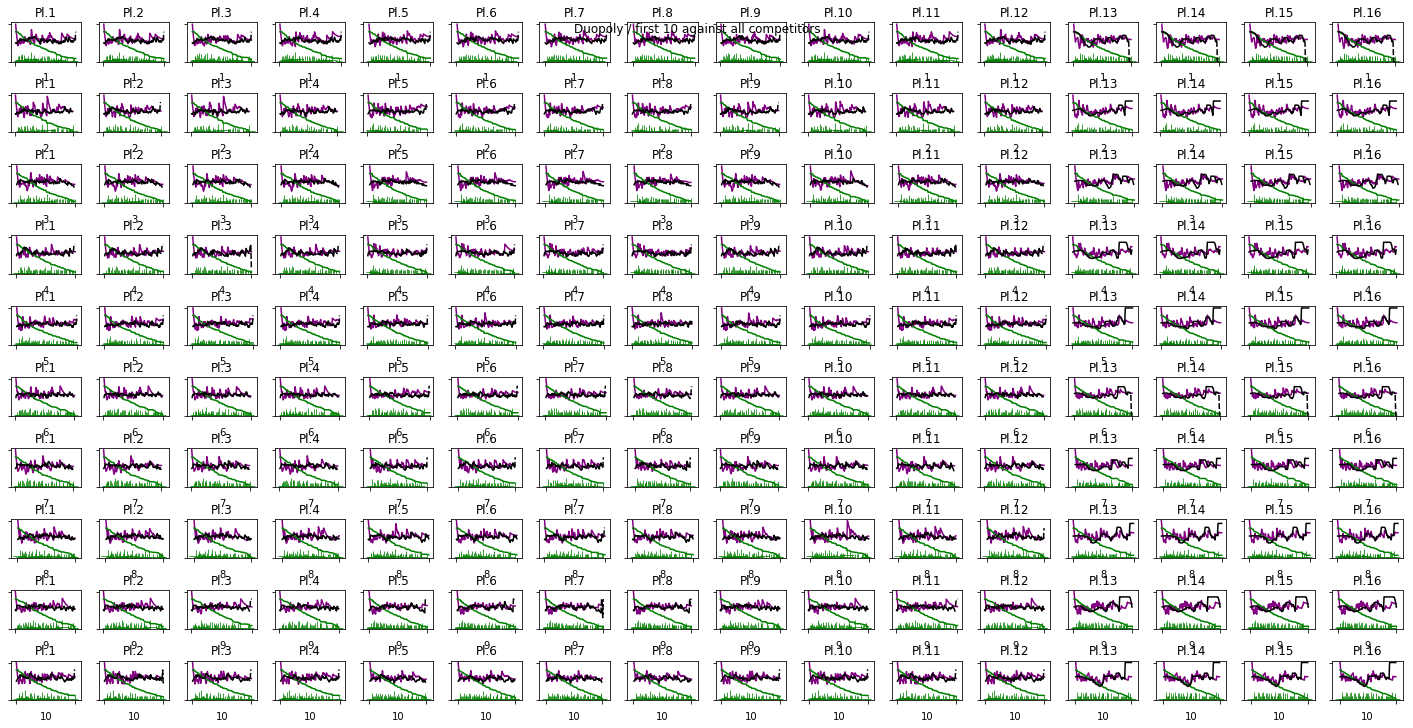

In [56]:
rounds = 10 # more rounds makes a smaller image
num_competitors = duopoly_trace['simulation'].max()
# plot first simulation against all competitors 
fig, axs = plt.subplots(rounds, num_competitors, sharex=False, sharey=True, figsize=(20,10)) 
fig.suptitle(f"Duopoly / first {rounds} against all competitors")
fig.tight_layout()
for season in range(rounds):
    for player in range(num_competitors):
        plot_one_simulation(axs[season, player], duopoly_trace, player+1, season+1, "")


In [57]:
def plot_overview(dataset, rounds=6, competition_name="Duopoly" ):
    '''generate a single fig for first ROUNDS (in rows) against each player (column).
    Title of chart is competition_name.'''
    
    num_competitors = dataset['simulation'].max()
    
    # plot first simulation against all competitors 
    fig, axs = plt.subplots(rounds, num_competitors, sharex=False, sharey=True, figsize=(20,10)) 
    fig.suptitle(f"{competition_name} / first {rounds} against all competitors")
    fig.tight_layout()
    for season in range(rounds):
        for player in range(num_competitors):
            plot_one_simulation(axs[season, player], dataset, player+1, 100-season+1, "")

#plot_overview(duopoly_trace)      

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


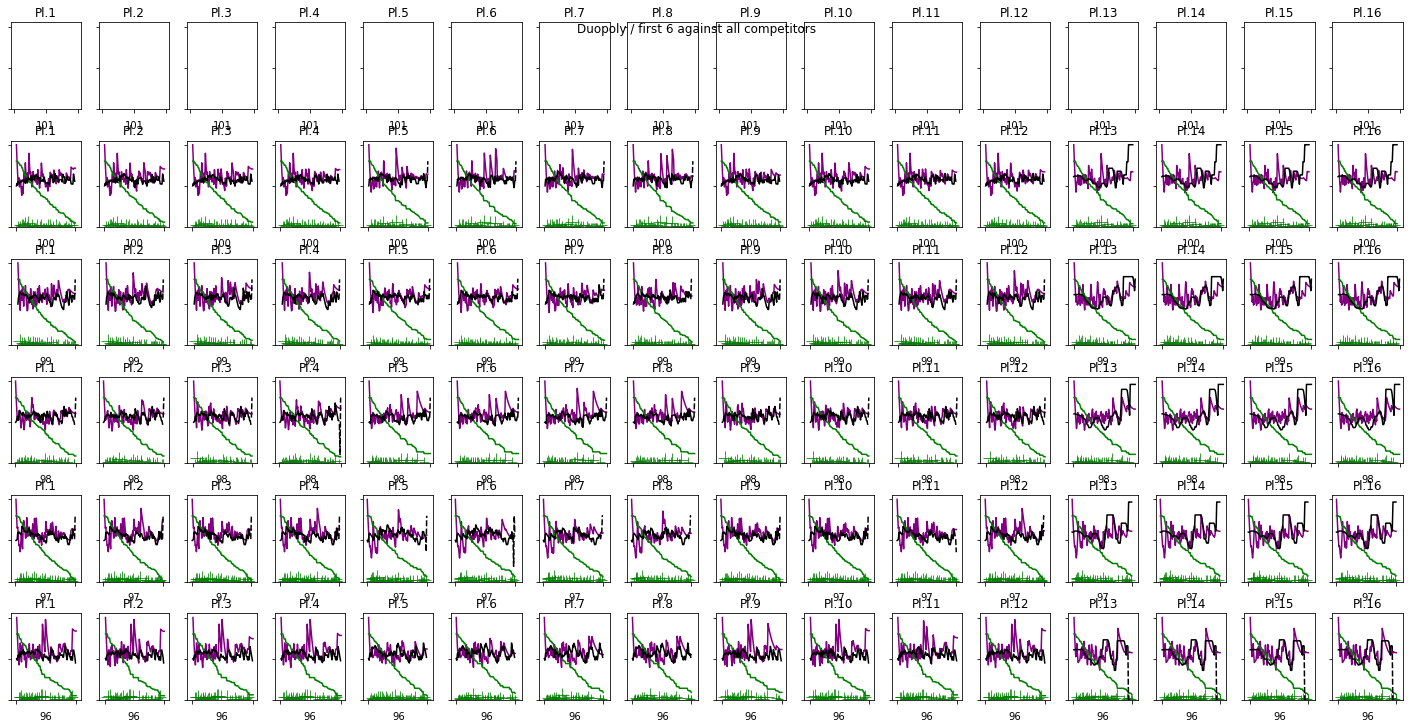

In [58]:
duopoly_trace_2 = pd.read_csv('../work/cloudruns/my_dpc_results_duopoly_2020-07-18.csv')
plot_overview(duopoly_trace_2)

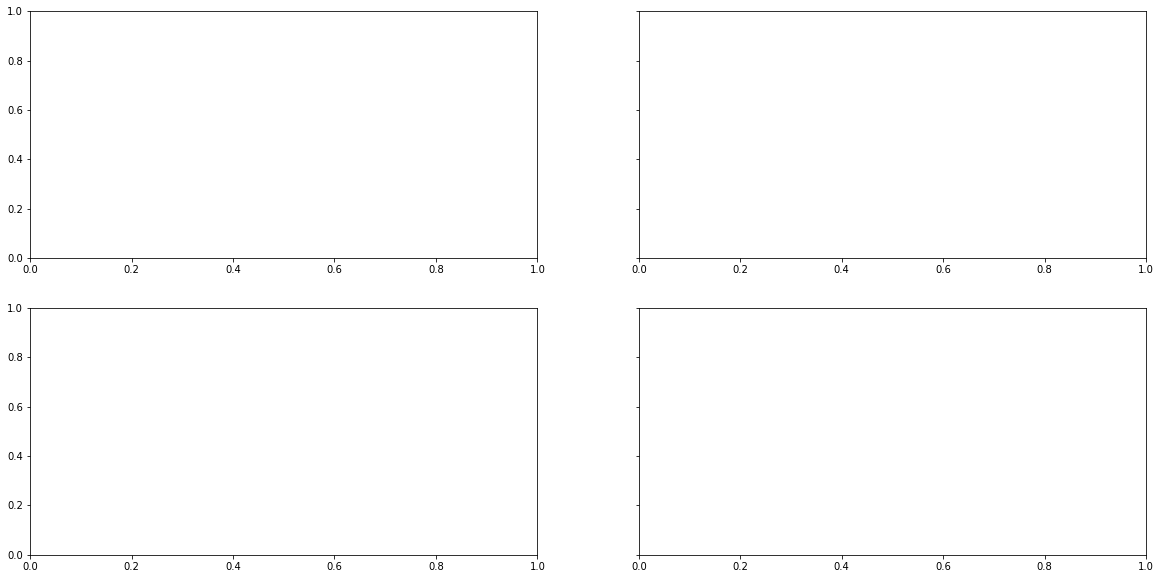

In [7]:
fig, axs = plt.subplots(2, 2, sharex=False, sharey=True, figsize=(20,10)) 
plot_one_simulation(ax, duopoly_trace_2, 5, 1, "duo")